In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors_dict = {
    "Red": "#8c0404",
    "Pink": "#f25ed0",
    "Black": "#000000",
    "Green": "#16A085",
    "Dark Blue": "#34495E",
    "Navy Blue": "#21618C",
    "Purple": "#512E5F",
    "Turquoise": "#45B39D",
    "Gray": "#AAB7B8",
    "Light Blue": "#20B2AA",
    "Hot Pink": "#FF69B4",
    "Dark Turquoise": "#00CED1",
    "Coral": "#FF7F50",
    "Lime": "#7FFF00",
    "Orchid": "#DA70D6"
}

In [195]:
df = pd.read_csv('/kaggle/input/pizza-sales-dataset/pizza_sales.csv')

<div style="text-align:center; background-color:#00008B; padding:20px;">
    <h1 style="color:white; font-size: 3em; font-weight: bold;">1.Exploratory Data Analysis (EDA)</h1>
</div>

In [196]:
df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [198]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [199]:
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [200]:
# replace the abbreciations
df['pizza_size'] = df['pizza_size'].replace({'S': 'Small', 'M': 'Medium', 'L': 'Large', 'XL' : 'X-Large' , 'XXL' : 'XX-Large'}, inplace=False)

In [201]:
# Grouping by 'order_id' and summing the 'total_price' for each unique order
total_sales_per_order = df.groupby('order_id')['total_price'].sum().reset_index()

total_sales_per_order

,order_id,total_price
0,1.0,13.25
1,2.0,92.00
2,3.0,37.25
3,4.0,16.50
4,5.0,16.50
...,...,...
21345,21346.0,62.25
21346,21347.0,66.50
21347,21348.0,46.70
21348,21349.0,20.25


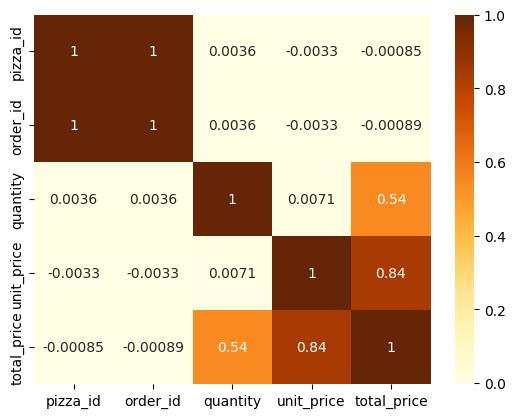

In [202]:
# Display the correlation for each column
numeric_columns = df.select_dtypes(include= ['number'])
sns.heatmap(numeric_columns.corr(),cmap = 'YlOrBr', annot =True)
plt.show()

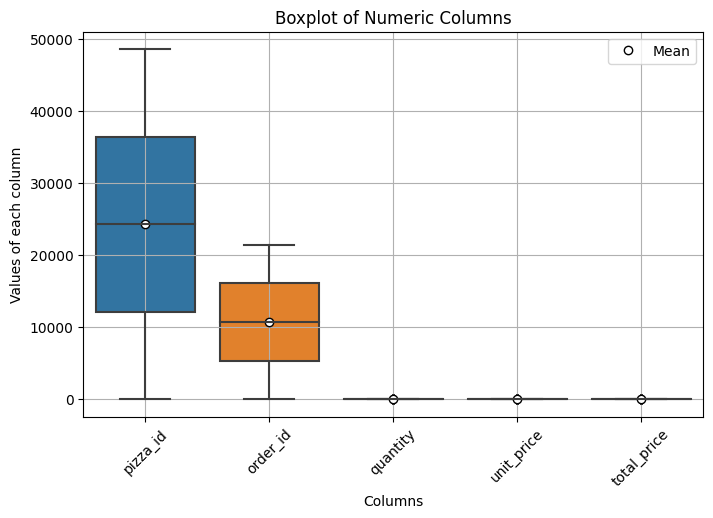

In [203]:
# Display the distribution of data based on the quartiles and potential outliers.
plt.figure(figsize=(8, 5))  # Set figure size
ax = sns.boxplot(data=df[numeric_columns.columns])
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values of each column')
plt.grid(True)

# Calculate and plot the mean
mean_values = df[numeric_columns.columns].mean().values
plt.plot(range(len(mean_values)), mean_values, marker='o', markerfacecolor='white', markersize=6, markeredgecolor='black', linestyle='', label='Mean')

plt.legend()  # Show legend for mean marker
plt.show()


In [204]:
# Detect outliers using IQR (Interquartile Range)
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_price'] < Q1 - 1.5 * IQR) | (df['total_price'] > Q3 + 1.5 * IQR)]

#to show all outliers
outliers

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
183,184.0,78.0,spicy_ital_l,3.0,2/1/2015,12:28:14,20.75,62.25,Large,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
211,212.0,91.0,bbq_ckn_l,2.0,2/1/2015,15:14:43,20.75,41.50,Large,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
341,342.0,144.0,bbq_ckn_m,3.0,3/1/2015,13:44:28,16.75,50.25,Medium,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
456,457.0,193.0,ckn_alfredo_l,2.0,3/1/2015,20:55:47,20.75,41.50,Large,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
611,612.0,271.0,cali_ckn_m,2.0,5/1/2015,14:22:19,16.75,33.50,Medium,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48396,48397.0,21251.0,four_cheese_l,2.0,30-12-2015,12:45:20,17.95,35.90,Large,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48417,48418.0,21260.0,prsc_argla_m,2.0,30-12-2015,15:45:32,16.50,33.00,Medium,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
48466,48467.0,21288.0,classic_dlx_m,3.0,31-12-2015,13:04:18,16.00,48.00,Medium,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
48575,48576.0,21331.0,bbq_ckn_l,2.0,31-12-2015,19:05:04,20.75,41.50,Large,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


<div style="text-align:center; background-color:red; padding:20px;">
    <h1 style="color:white; font-size: 3em; font-weight: bold;">2.Data Visualization</h1>
</div>

***Percentage of sales of each pizza category***

Text(0, 0.5, 'Category Percentage')

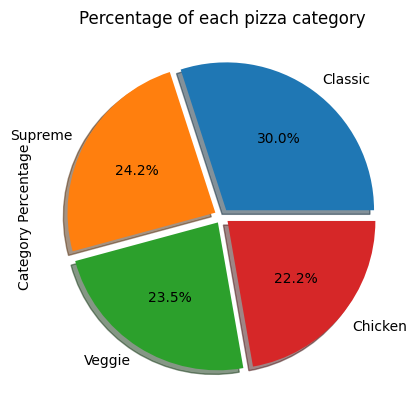

In [205]:
#the percentage of the online orders in the restauants
df['pizza_category'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.05, 0.05, 0.05 ,0.05], shadow=True)
plt.title('Percentage of each pizza category')
plt.ylabel('Category Percentage')

***Top 5 most popular pizza names***

Text(0, 0.5, 'Count')

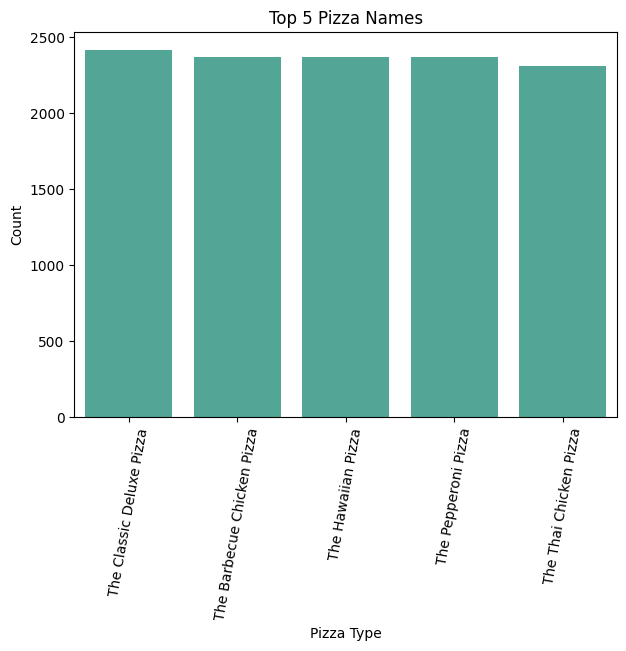

In [206]:
Top_5_types = df['pizza_name'].value_counts().head(5).index.tolist()

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='pizza_name', order=Top_5_types ,color = colors_dict["Turquoise"] )
plt.xticks(rotation=80)
plt.title('Top 5 Pizza Names')
plt.xlabel('Pizza Type')
plt.ylabel('Count')

***Number of sales of each pizza size***

Text(0, 0.5, 'pizza counts')

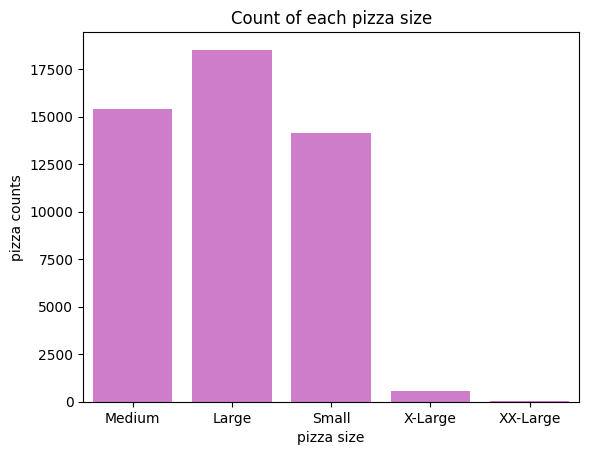

In [207]:
sns.countplot(data =df , x= 'pizza_size' , color =colors_dict["Orchid"])
plt.title('Count of each pizza size')
plt.xlabel('pizza size')
plt.ylabel('pizza counts')

***The 20 most customers paid for orders to measure the level of service to them at that time***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '12.0'),
  Text(1, 0, '12.5'),
  Text(2, 0, '13.25'),
  Text(3, 0, '16.5'),
  Text(4, 0, '20.25'),
  Text(5, 0, '20.5'),
  Text(6, 0, '24.75'),
  Text(7, 0, '30.5'),
  Text(8, 0, '37.25'),
  Text(9, 0, '40.75'),
  Text(10, 0, '41.0'),
  Text(11, 0, '50.7'),
  Text(12, 0, '63.25'),
  Text(13, 0, '70.75'),
  Text(14, 0, '73.5'),
  Text(15, 0, '92.0'),
  Text(16, 0, '143.25'),
  Text(17, 0, '184.5')])

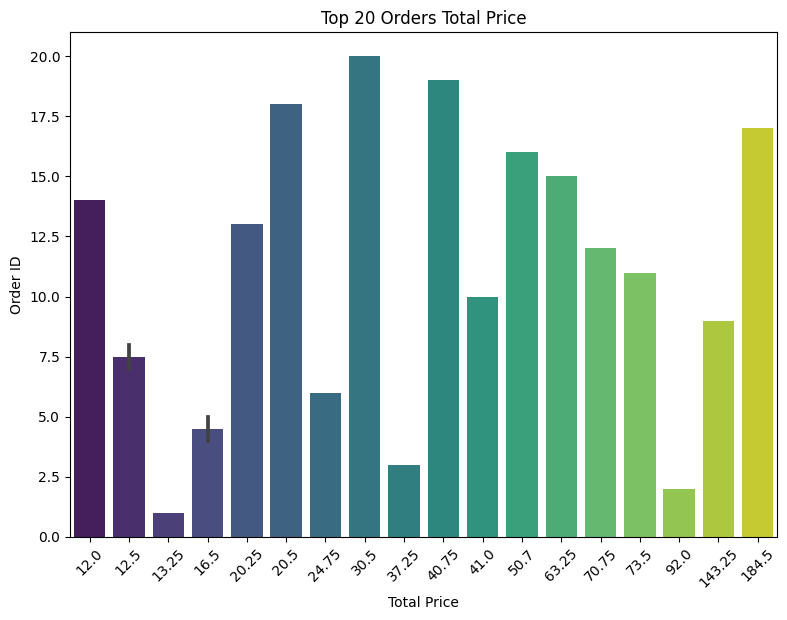

In [208]:
top_20_orders_price = df.groupby('order_id')['total_price'].sum().reset_index().head(20)

plt.figure(figsize=(8, 6))
sns.barplot(data=top_20_orders_price, y='order_id', x='total_price', palette='viridis')
plt.title('Top 20 Orders Total Price')
plt.xlabel('Total Price')
plt.ylabel('Order ID')
plt.tight_layout()
plt.xticks(rotation=45)

***Visualize the distribution of numerical data***

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Classic'),
  Text(1, 0, 'Veggie'),
  Text(2, 0, 'Supreme'),
  Text(3, 0, 'Chicken')])

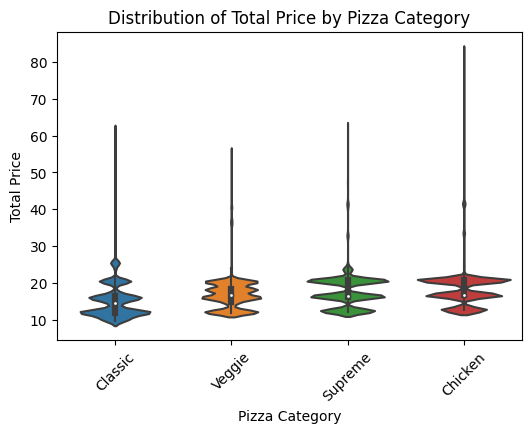

In [209]:
# violin plot could be a great option to visualize the distribution of numerical data across various categories
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='pizza_category', y='total_price')
plt.title('Distribution of Total Price by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Price')
plt.xticks(rotation=45)

<div style="text-align:center; background-color:orange; padding:20px;">
    <h1 style="color:white; font-size: 3em; font-weight: bold;">3. Data Export</h1>
    <p style="color:white; font-size: 1.5em; text-align: center;">I will utilize this cleaned dataset to load into Power BI for creating an interactive dashboard.</p>
</div>


In [210]:
df.to_csv('cleaned_pizza_sales.csv')